<h1>Dimension Reduction Using Polynomials </h2>

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In this notebook we will demonstrate how to use the dimension reduction utilities in the Effective Quadratures. First, let's upload some data. The data used here is a set of CFD runs for a blade, parameterized with 25 variables. The distribution of the CFD evaluations within the input space is uniform, as they were carried out using Latin hypercube sampling. 

In [2]:
X = np.loadtxt('AirfoilX.data')
fX = np.loadtxt('AirfoilY.data')

The X data comprises of various combinations of the 25 design variables, while the fX data is the normalized efficiency. Our first task is to set up the necessary Effective Quadratures objects starting from the parameter, to the basis.

In [3]:
parameters = []
totalorders = []
dimensions = 25
maxorder = 2
for i in range(0, 25):
    parameter = Parameter(param_type='Uniform', lower=-1., upper=1., order=maxorder)
    parameters.append(parameter)
    totalorders.append(maxorder)
basis = Basis('Total order', totalorders)    

Now, we set up a "Polyreg" object!

In [4]:
Poly = Polyreg(training_x=X, training_y=fX, parameters=parameters, basis=basis)

Next, we compute the active subspaces!

In [5]:
e, W = Poly.computeActiveSubspaces(samples=X)

Now, we plot the eigenvalues to see how many active variables we need...

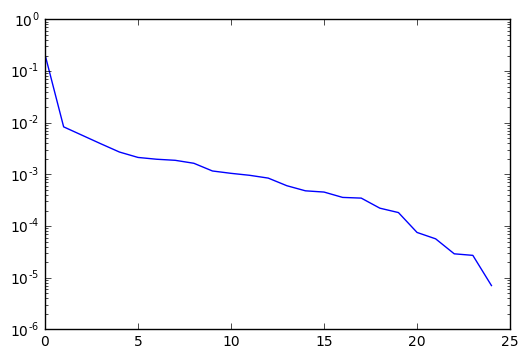

In [14]:
fig = plt.figure()
plt.semilogy(np.arange(0, 25), np.abs(e))

From this plot, the first two eigenvectors seem suitable.

In [ ]:
active1 = np.dot( X , W[:,0] ) 
active2 = np.dot( X , W[:,1] )

Finally, we plot the result!

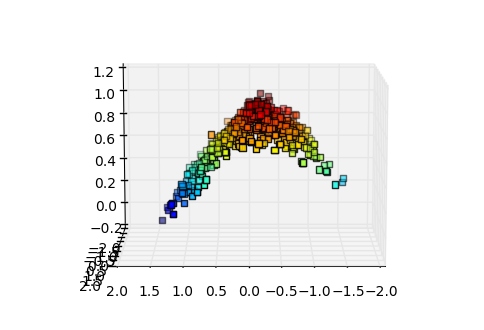

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(active1, active2, fX, c=fX, marker='s')
ax.view_init(10, 90)